In [76]:
# how does removing rf06 impact bl mixing ratios?
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [77]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [78]:
# load in data
awas_df_no6 = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df_twp_noRF06.pkl")
toga_df_no6 = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df_twp_noRF06.pkl")

awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df_twp.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df_twp.pkl")

In [113]:
# format awas data 
# with rf06
awas_trc = awas_df[['Flight', 'Intrument', 'GGALT', 'GGLAT', 'GGLON', 
                    'C6H6_Benzene', 'CHBr3_Bromoform', 'C2H2_Ethyne', 
                   'C2H4Cl2_1_2_Dichloroethane', 'CH2Cl2_Methylene_chloride', 
                   'CH3Cl_Methyl_chloride', 'CH3Br_Methyl_bromide']]
awas_trc_bl = awas_trc[awas_trc['GGALT'] <2000]

# without rf06
awas_trc_no6 = awas_df_no6[['Flight', 'Intrument', 'GGALT', 'GGLAT', 'GGLON', 
                    'C6H6_Benzene', 'CHBr3_Bromoform', 'C2H2_Ethyne', 
                   'C2H4Cl2_1_2_Dichloroethane', 'CH2Cl2_Methylene_chloride', 
                   'CH3Cl_Methyl_chloride', 'CH3Br_Methyl_bromide']]
awas_trc_bl_no6 = awas_trc_no6[awas_trc_no6['GGALT'] <2000]

In [87]:
# format toga data 
# with rf06
toga_trc = toga_df[['Flight', 'Intrument', 'GGALT', 'GGLAT', 'GGLON', 
                    'Dibromomethane', 'Dichloromethane', 'Bromoform', 'Acetaldehyde', 
                    'C3H8', 'Chloroform', 'Benzene', 'Carbon_Tetrachloride']]
toga_trc_bl = toga_trc[toga_trc['GGALT'] <2000]

# without rf06
toga_trc_no6 = toga_df_no6[['Flight', 'Intrument', 'GGALT', 'GGLAT', 'GGLON', 
                    'Dibromomethane', 'Dichloromethane', 'Bromoform', 'Acetaldehyde', 
                    'C3H8', 'Chloroform', 'Benzene', 'Carbon_Tetrachloride']]
toga_trc_bl_no6 = toga_trc_no6[toga_trc_no6['GGALT'] <2000]

In [84]:
# make plotting function 
def plt_bxs(df_with, df_without, minn, maxx):
    fig, ax = plt.subplots(ncols = 2, figsize = (10, 5))
    plt.rcParams.update({'font.size': 14})
    plt.rcParams["axes.labelsize"] = 14
 
    # colors 
    whiskerprops = dict(linestyle='-',linewidth=3.0, color='k')
    capprops = dict(linestyle='-', linewidth=3, color='k')

    # without rf06
    c = sns.color_palette("Set2")[2]
    medianprops = dict(linestyle='-', linewidth=3, color='k')
    boxprops = dict(linestyle='-', linewidth=3, color=c)
    meanprops = dict(marker='x', markeredgecolor='k', markersize=12, markeredgewidth=3)
    flierprops = dict(marker='^', markerfacecolor = c, markersize=8)

    sns.boxplot(x=df_without, color='b', ax = ax[0],
                orient = 'v', whis = 1.5, width = 0.5, linewidth = 3, 
                showmeans = True, showfliers=True,
                boxprops=boxprops, medianprops=medianprops,
                meanprops=meanprops, flierprops=flierprops, 
                whiskerprops=whiskerprops, capprops = capprops)
    ax[0].set_title('No RF06')
    ax[0].set_ylim([minn, maxx])
    ax[0].grid(which = 'major')

    # with rf06
    c = sns.color_palette("Set2")[0]
    medianprops = dict(linestyle='-', linewidth=3, color='k')
    boxprops = dict(linestyle='-', linewidth=3, color=c)
    meanprops = dict(marker='x', markeredgecolor='k', markersize=12, markeredgewidth=3)

    flierprops = dict(marker='^', markerfacecolor = c, markersize=8)

    sns.boxplot(x=df_with, color='b', ax = ax[1],
                orient = 'v', whis = 1.5, width = 0.5, linewidth = 3, 
                showmeans = True, showfliers=True,
                boxprops=boxprops, medianprops=medianprops,
                meanprops=meanprops, flierprops=flierprops, 
                whiskerprops=whiskerprops, capprops = capprops)
    ax[1].set_title('With RF06')
    ax[1].set_ylim([minn, maxx])
    ax[1].grid(which = 'major')
    plt.tight_layout()

In [ ]:
################################################################################
################################################################################
# -------------------------------- AWAS PLOTS -------------------------------- #

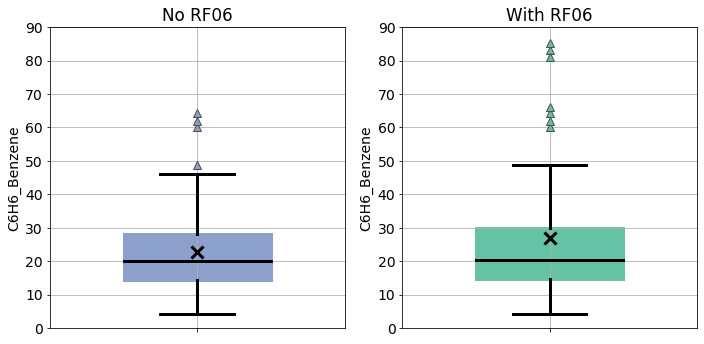

In [85]:
# plot -- BENZENE -- 
minn = 0
maxx = 90
df_with = awas_trc_bl["C6H6_Benzene"]
df_without = awas_trc_bl_no6["C6H6_Benzene"]
plt_bxs(df_with, df_without, minn, maxx)

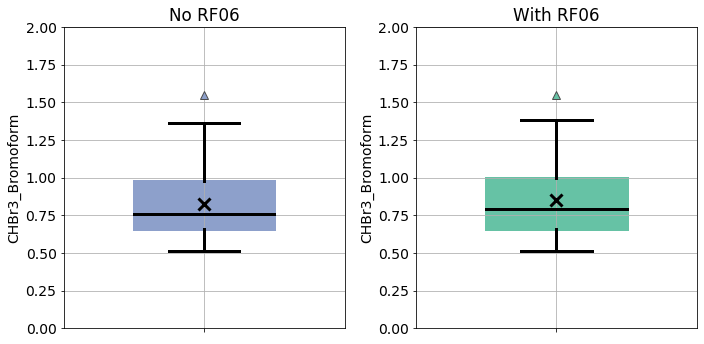

In [86]:
# plot -- BROMOFORM -- 
minn = 0 
maxx = 2 
df_with = awas_trc_bl["CHBr3_Bromoform"]
df_without = awas_trc_bl_no6["CHBr3_Bromoform"]
plt_bxs(df_with, df_without, minn, maxx)

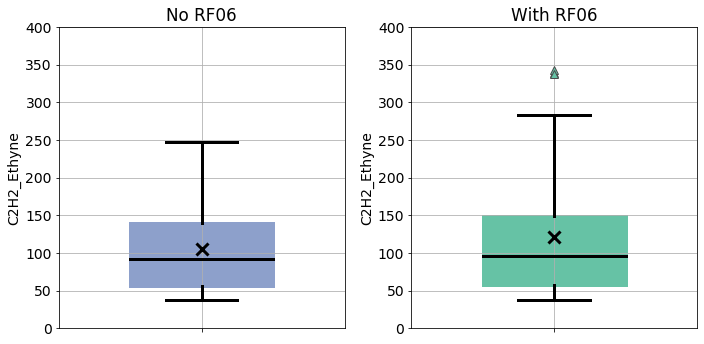

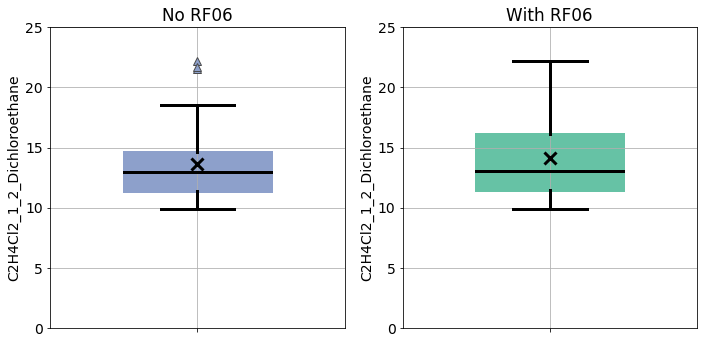

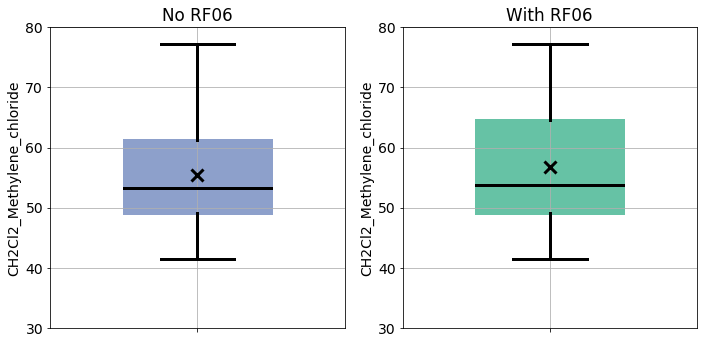

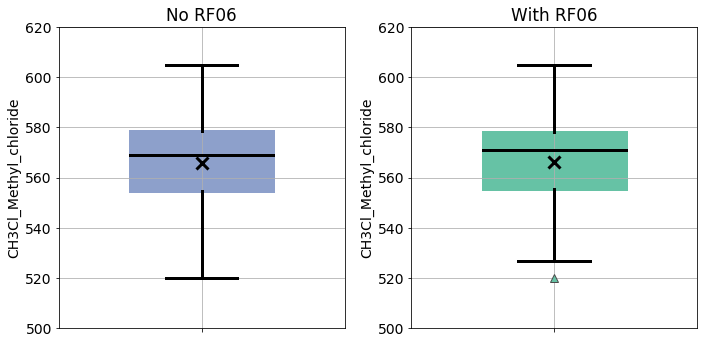

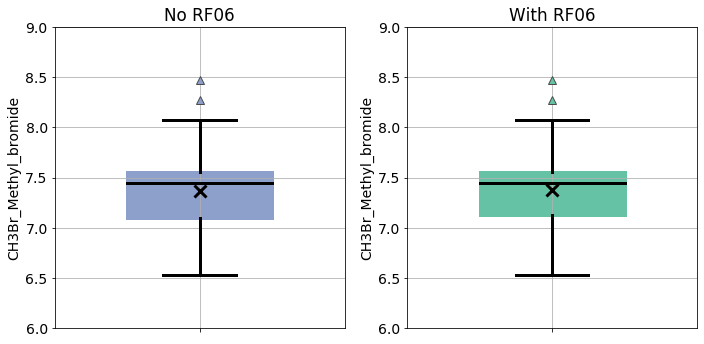

In [122]:
# plot -- C2H2_Ethyne -- 
minn = 0 
maxx = 400
df_with = awas_trc_bl["C2H2_Ethyne"]
df_without = awas_trc_bl_no6["C2H2_Ethyne"]
plt_bxs(df_with, df_without, minn, maxx)

# plot -- C2H4Cl2_1_2_Dichloroethane -- 
minn = 0 
maxx = 25
df_with = awas_trc_bl["C2H4Cl2_1_2_Dichloroethane"]
df_without = awas_trc_bl_no6["C2H4Cl2_1_2_Dichloroethane"]
plt_bxs(df_with, df_without, minn, maxx)

# plot -- CH2Cl2_Methylene_chloride -- 
minn = 30 
maxx = 80
df_with = awas_trc_bl["CH2Cl2_Methylene_chloride"]
df_without = awas_trc_bl_no6["CH2Cl2_Methylene_chloride"]
plt_bxs(df_with, df_without, minn, maxx)

# plot -- CH3Cl_Methyl_chloride -- 
minn = 500 
maxx = 620
df_with = awas_trc_bl["CH3Cl_Methyl_chloride"]
df_without = awas_trc_bl_no6["CH3Cl_Methyl_chloride"]
plt_bxs(df_with, df_without, minn, maxx)

# plot -- CH3Br_Methyl_bromide -- 
minn = 6 
maxx = 9
df_with = awas_trc_bl["CH3Br_Methyl_bromide"]
df_without = awas_trc_bl_no6["CH3Br_Methyl_bromide"]
plt_bxs(df_with, df_without, minn, maxx)


In [71]:
################################################################################
################################################################################
# -------------------------------- TOGA PLOTS -------------------------------- #

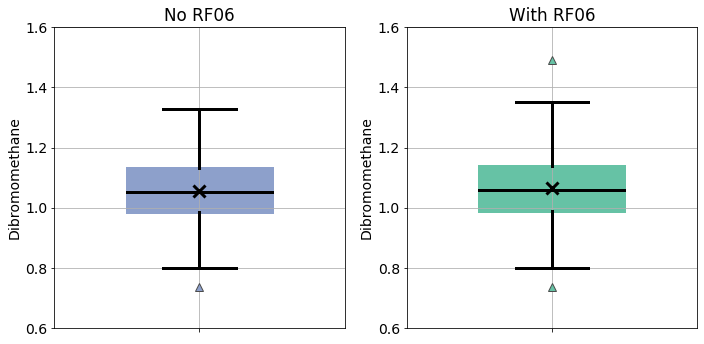

In [91]:
# plot -- Dibromomethane-- 
minn = 0.6 
maxx = 1.6 
df_with = toga_trc_bl["Dibromomethane"]
df_without = toga_trc_bl_no6["Dibromomethane"]
plt_bxs(df_with, df_without, minn, maxx)

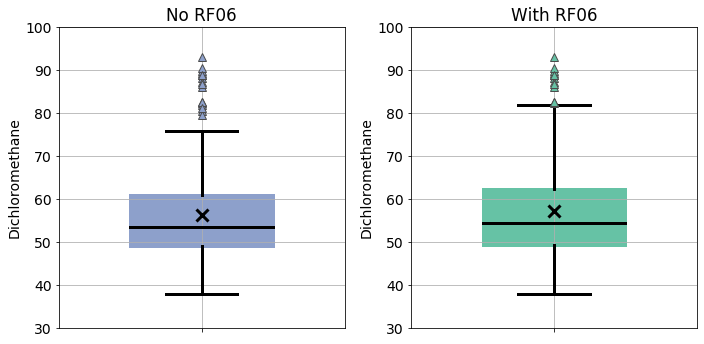

In [95]:
# plot -- Dichloromethane-- 
minn = 30
maxx = 100
df_with = toga_trc_bl["Dichloromethane"]
df_without = toga_trc_bl_no6["Dichloromethane"]
plt_bxs(df_with, df_without, minn, maxx)

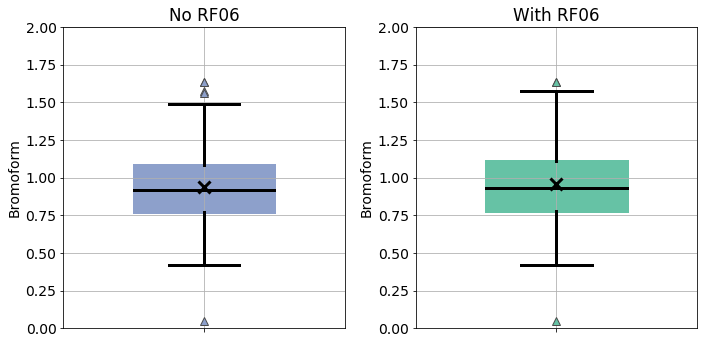

In [97]:
# plot -- Dichloromethane-- 
minn = 0
maxx = 2
df_with = toga_trc_bl["Bromoform"]
df_without = toga_trc_bl_no6["Bromoform"]
plt_bxs(df_with, df_without, minn, maxx)

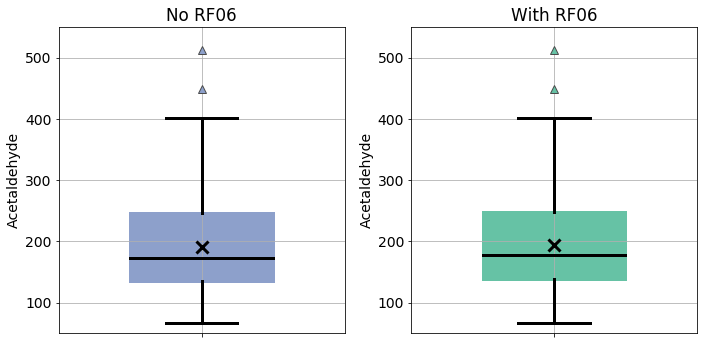

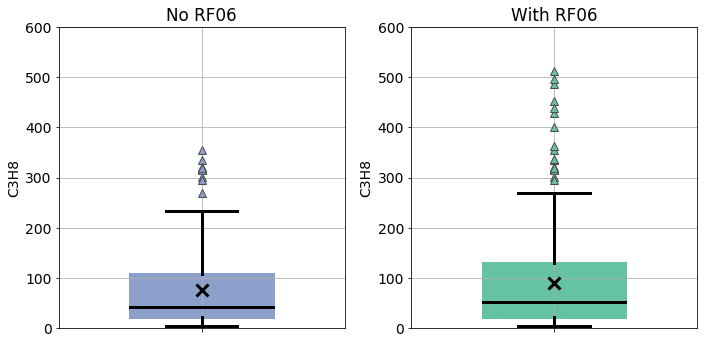

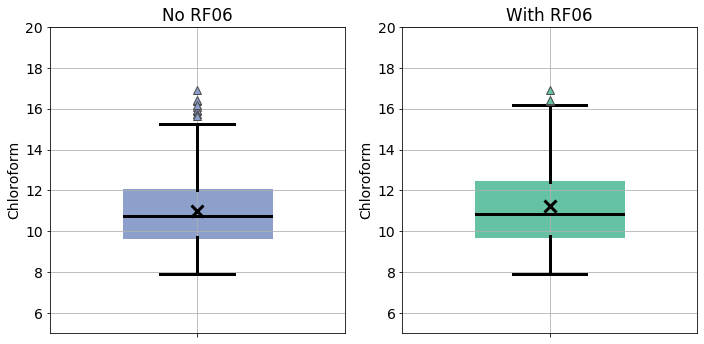

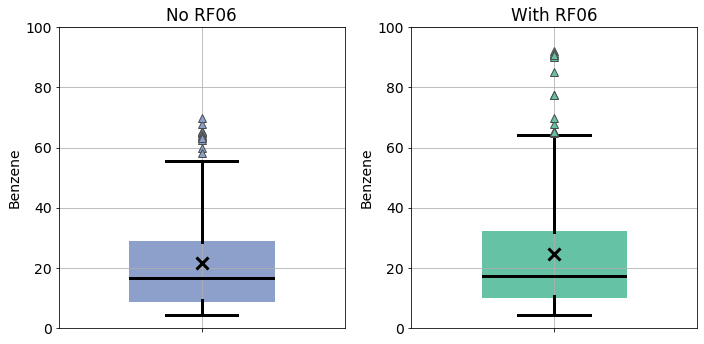

In [111]:
# plot -- Acetaldehyde-- 
minn = 50
maxx = 550
df_with = toga_trc_bl["Acetaldehyde"]
df_without = toga_trc_bl_no6["Acetaldehyde"]
plt_bxs(df_with, df_without, minn, maxx)

# plot -- C3H8-- 
minn = 0
maxx = 600
df_with = toga_trc_bl["C3H8"]
df_without = toga_trc_bl_no6["C3H8"]
plt_bxs(df_with, df_without, minn, maxx)

# plot -- Chloroform-- 
minn = 5
maxx = 20
df_with = toga_trc_bl["Chloroform"]
df_without = toga_trc_bl_no6["Chloroform"]
plt_bxs(df_with, df_without, minn, maxx)

# plot -- Benzene-- 
minn = 0
maxx = 100
df_with = toga_trc_bl["Benzene"]
df_without = toga_trc_bl_no6["Benzene"]
plt_bxs(df_with, df_without, minn, maxx)